Load pyHH Libraries:

https://github.com/swharden/pyHH

https://github.com/swharden/pyHH




Set working directory to root folder:

In [ ]:
%cd '/content/drive/MyDrive/HODKIN-HUXLEY_Python/modelo_patch_HH/modelo HH Python/pyHH-master/'

/content/drive/MyDrive/HODKIN-HUXLEY_Python/modelo_patch_HH/modelo HH Python/pyHH-master


In [ ]:
import sys
import os
if not os.path.exists("./src/pyhh/__init__.py"):
    raise Exception("script must be run in project root folder")
sys.path.append("./src")

import numpy as np
import matplotlib.pyplot as plt
import pyhh

Create model:

In [ ]:
model = pyhh.HHModel()

In [ ]:
#@title Model parameters
model.gNa  = 100 #@param {type:"slider", min:50, max:200, step:0.1}
model.gK = 10 #@param {type:"slider", min:0, max:100, step:0.5}
model.EK = 10.5 #@param {type:"slider", min:-100, max:100, step:0.5}


#print('gNa = {}, gK = {}, EK = {}'.format(model.gNa,model.gK,model.EK))

In [ ]:
#@title Simulation parameters
simul_length  = 20000 #@param {type:"slider", min:0, max:50000, step:0.1}


Define stimulation input signal:

In [ ]:
#@title Input stimulation (slides)
pulse_position = 10000 #@param {type:"slider", min:0, max:50000, step:0.5}
pulse_width = 5000 #@param {type:"slider", min:0, max:25000, step:0.5}
pulse_amplitude = 50 #@param {type:"slider", min:0, max:100, step:0.5}

Create input stimulation signal

In [ ]:
# customize a stimulus waveform
stim = np.zeros(simul_length)
stim[np.int(pulse_position-np.floor(0.5*pulse_width)):np.int(pulse_position+np.floor(0.5*pulse_width))] = pulse_amplitude  # add a square pulse

Simulate

In [ ]:
# simulate the model cell using the custom waveform
sim = pyhh.Simulation(model)
sim.Run(stimulusWaveform=stim, stepSizeMs=0.01)

simulating 20000 time points...
simulation complete


Plot Stuff


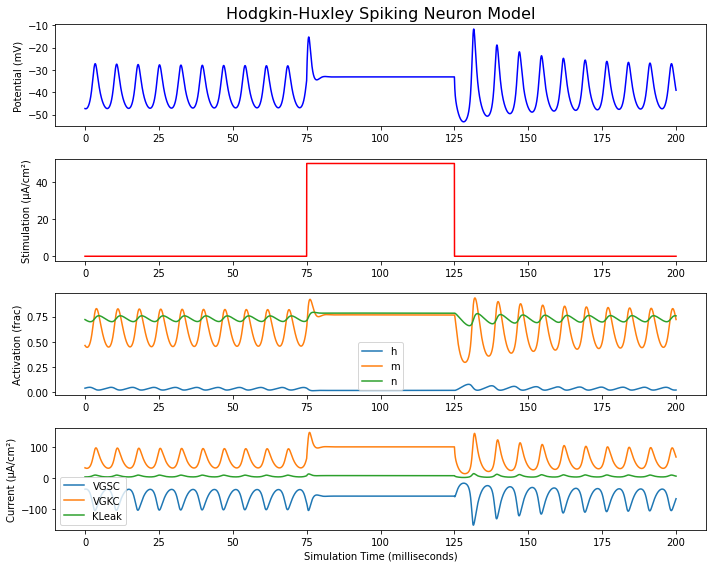

In [ ]:
# plot the results with MatPlotLib
plt.figure(figsize=(10, 8))

ax1 = plt.subplot(411)
ax1.plot(sim.times, sim.Vm - 70, color='b')
ax1.set_ylabel("Potential (mV)")
ax1.set_title("Hodgkin-Huxley Spiking Neuron Model", fontSize=16)

ax2 = plt.subplot(412)
ax2.plot(sim.times, stim, color='r')
ax2.set_ylabel("Stimulation (µA/cm²)")

ax3 = plt.subplot(413, sharex=ax1)
ax3.plot(sim.times, sim.StateH, label='h')
ax3.plot(sim.times, sim.StateM, label='m')
ax3.plot(sim.times, sim.StateN, label='n')
ax3.set_ylabel("Activation (frac)")
ax3.legend()

ax4 = plt.subplot(414, sharex=ax1)
ax4.plot(sim.times, sim.INa, label='VGSC')
ax4.plot(sim.times, sim.IK, label='VGKC')
ax4.plot(sim.times, sim.IKleak, label='KLeak')
ax4.set_ylabel("Current (µA/cm²)")
ax4.set_xlabel("Simulation Time (milliseconds)")
ax4.legend()

plt.tight_layout()
plt.savefig("tests/demo.png")
plt.show()